Modeling Corn Production

Suppose that you manage a small corn farm and are interested in optimizing your costs. In this illustrative exercise, we will model the production of corn. We'll abstract away from details like units and focus on the process.

For simplicity, let's assume that corn production depends on only two factors: rain, which you don't control, and cost, which you control. Rain is normally distributed with mean 50 and standard deviation 15. For now, let's fix cost at 5,000. Let's assume that corn produced in any season is a Poisson random variable and that the average corn production is governed by the equation:

100 * cost^0.1 * rain^0.2
    
Let's model this production function and simulate one outcome.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
# Initialize rain as a Normal random variable with mean 50 and standard deviation 15.

cost = 5000
rain = np.random.normal(loc=50, scale=15)


In [288]:
# Model corn production as a Poisson distribution, with the mean given by the formula above

def corn_produced(rain, cost):
    mean_corn =  100 * (cost**0.1) * (rain**0.2)
    corn = np.random.poisson(lam = mean_corn)
    return corn

In [289]:
corn_result = corn_produced(rain, cost)
corn_result

495

In [290]:
def corn_demanded(price):
    mean_corn = 1000 - 8*price
    corn = np.random.poisson(abs(mean_corn))
    return corn

In [291]:
corn_demand = corn_demanded(40)
corn_demand

730

Modeling Profits

In the previous exercise, you built a model of corn production. For a small farm, you typically have no control over the price or demand for corn. Suppose that price is normally distributed with mean 40 and standard deviation 10. You are given a function corn_demanded(), which takes the price and determines the demand for corn. This is reasonable because demand is usually determined by the market and is not in your control.

In this exercise, you will work on a function to calculate the profit by pulling together all the other simulated variables. The only input to this function will be the fixed cost of production. Upon completion, you'll have a function that gives one simulated profit outcome for a given cost. This function can then be used for planning your costs.

In [298]:
# Function to calculate profits
def profits(cost):
    rain = np.random.normal(50, 15)
    price = np.random.normal(40, 10)
    supply = corn_produced(rain, cost) # supply calculated with the cost paid to produce the corn
    demand = corn_demanded(price) # demand calculated with the current corn price
    equil_short = supply <= demand
    # Profit = quantity * price - cost. 
    # If more corn is produced than demanded (supply > demand), then quantity sold will be demand, else it will be supply.
    if equil_short == True:
        profit = supply*price - cost
    else: 
        profit = demand*price - cost
        
    return profit, supply, demand

In [301]:
profit, supply, demand = profits(cost)

print('supply:',supply,'demand:',demand)
print("Simulated profit = {}".format(profit))

supply: 539 demand: 634
Simulated profit = 17956.552405492013


Optimizing Costs

Now we will use the functions you've built to optimize our cost of production. We are interested in maximizing average profits. However, our profits depend on a number of factors, while we only control cost. Thus, we can simulate the uncertainty in the other factors and vary cost to see how our profits are impacted.

Since you manage the small corn farm, you have the ability to choose your cost - from 100 to 7,000. You want to choose the cost that gives you the maximum average profit. In this exercise, we will simulate multiple outcomes for each cost level and calculate an average. We will then choose the cost that gives us the maximum mean profit. Upon completion, you will have a framework for selecting optimal inputs for business decisions.

In [314]:
# Initialize results and cost_levels variables
sims, results = 1000, {}
cost_levels = np.arange(100, 7100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = []
    for i in range(sims):
        tmp_profits.append(profits(cost))
    results[cost] = np.mean(tmp_profits)

results

C:\Users\Alienware\AppData\Local\Temp\ipykernel_17520\2872174744.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  corn = np.random.poisson(lam = mean_corn)


{100: 4842.9053699170745,
 200: 5215.927909443944,
 300: 5336.422128657813,
 400: 5453.093986241695,
 500: 5597.869216040715,
 600: 5590.221078684396,
 700: 5669.964286128694,
 800: 5804.764711881407,
 900: 5785.153881414526,
 1000: 5805.554176779837,
 1100: 5818.537354213019,
 1200: 5828.61432128402,
 1300: 5813.882397872997,
 1400: 5898.800312966638,
 1500: 5865.366788986298,
 1600: 5916.226203883093,
 1700: 5983.037956940152,
 1800: 5920.108499846628,
 1900: 5862.004844939208,
 2000: 5840.769517994809,
 2100: 5918.58918541387,
 2200: 5915.12092626162,
 2300: 5852.35350747419,
 2400: 5809.92146424652,
 2500: 5774.287796627825,
 2600: 5787.319385583934,
 2700: 5843.168207273903,
 2800: 5806.088973842993,
 2900: 5790.119919875685,
 3000: 5807.166499171225,
 3100: 5776.907154019199,
 3200: 5800.129476696529,
 3300: 5766.27594097353,
 3400: 5805.530528674481,
 3500: 5784.893828246286,
 3600: 5710.761881591379,
 3700: 5647.37382944565,
 3800: 5705.8091879341455,
 3900: 5716.550306905693,


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

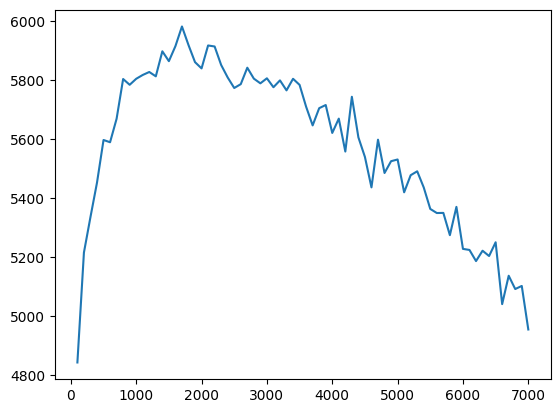

In [315]:
sns.lineplot(x=results.keys(), y=results.values())

In [321]:
# Get the cost that maximizes average profit
cost_max = [x for x in results.keys() if results[x] == max(results.values())][0]
print("Average profit is maximized when cost = {}".format(cost_max))

Average profit is maximized when cost = 1700


In [310]:
results.values()

dict_values([4912.988113398171, 5176.155729159644, 5374.608476987388, 5466.8843883653835, 5475.437677528277, 5615.827502771025, 5723.022912971913, 5833.546486669002, 5763.462172404686, 5730.039733616947, 5870.485218554273, 5871.27060255856, 5877.273489979759, 5936.3150765684995, 5911.147220546216, 5753.883306501591, 5917.597083774565, 5852.674080589783, 5764.642586369238, 5868.732701083309, 5967.328823443627, 5889.224602164793, 5958.7642388017375, 5885.386330947424, 5947.68458066403, 5816.6062957062895, 5849.062451877506, 5841.611088370571, 5912.438284406524, 5872.013989544963, 5848.441172462146, 5759.669480013032, 5755.557511260808, 5739.490376840338, 5705.145965445091, 5734.443344775519, 5817.742539915318, 5711.970986703808, 5717.103102105446, 5561.13193073057, 5671.07423313767, 5798.471391574338, 5606.310283286605, 5514.81896096576, 5516.549976656765, 5556.15569728963, 5573.811341998971, 5523.732314332771, 5491.348273948523, 5546.9652555953235])